# Intro

It's the last time we meet in class for exercises! And to celebrate this mile-stone, I've put together an very nice little set of exercises. And if you're behind, don't worry. The workload is low!

  - Part A: First, we play around with sentiment analysis
  - That's it!


# Part A: Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Wiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



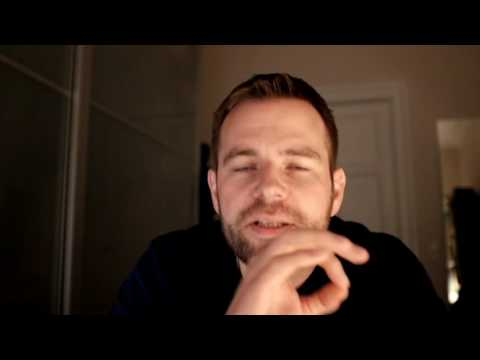

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

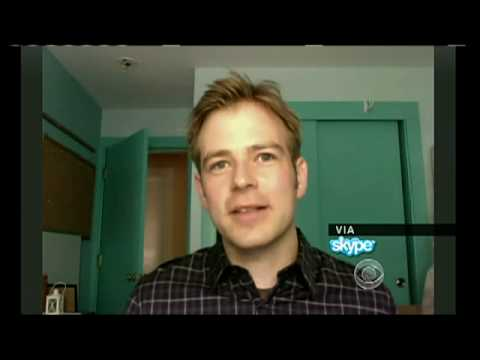

In [2]:
# There's also this one from 2010
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


*Exercise*: Sentiment distribution. 
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.
> * Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.
> * Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.
> * Who are the 10 artists with happiest and saddest pages?

<div class="alert alert-block alert-info">
As long as you get the plots right, it's OK to use LLM help here.
</div>

*Exercise*: Community sentiment distribution. 
  
> * Last week we calculated the stuctural communities of the graph. For this exercise, we use those communities (just the 10 largest ones). Specifically, you should calculate the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected characters. 
>   - What are the three happiest communities? 
>   - what are the three saddest communities?
>   - Do these results confirm what you can learn about each community by comparing to the genres, checking out the word-clouds for each community, and reading the wiki-pages? 
> * Compare the sentiment of the happiest and saddest communities to the overall (entire network) distribution of sentiment that you calculated in the previous exercise. Are the communities very differenct from the average? Or do you find the sentiment to be quite similar across all of the communities?

<div class="alert alert-block alert-info">
As above, feel free to go nuts with help from an LLM with this exercise for the technical parts. But try to answer the questions about interpreting the results with your own human brain.
</div>

**Note**: Calculating sentiment takes a long time, so arm yourself with patience as your code runs (remember to check that it runs correctly, before waiting patiently). Further, these tips may speed things up. And save somewhere, so you don't have to start over.

**Tips for speed**
* If you use `freqDist` prior to finding the sentiment, you only have to find it for every unique word and hereafter you can do a weighted mean.
* More tips for speeding up loops https://wiki.python.org/moin/PythonSpeed/PerformanceTips#Loops

Researchers analyzed over 46 billion words from nearly 4.6 billion tweets by 63 million unique users over 33 months. They selected words based on their frequency of use on Twitter to ensure a representative sample. A survey was conducted where participants rated over 10,000 individual words on a happiness scale, leading to the development of a final wordlist that combines frequency data with happiness ratings. This comprehensive set of words is then used to measure happiness levels in tweets.

In [13]:
import os
import networkx as nx
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have the necessary NLTK data files
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def load_labmt_wordlist(filepath):
    """
    Load the LabMT word list from a file into a dictionary.

    Parameters:
    filepath (str): Path to the LabMT word list file.

    Returns:
    dict: Dictionary with words as keys and happiness scores as values.
    """
    labmt_dict = {}
    with open(filepath, 'r') as file:
        # Skip the header lines
        next(file)
        next(file)
        
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) > 2 and parts[2] != 'happiness_average':
                try:
                    word = parts[0]
                    happiness_score = float(parts[2])
                    labmt_dict[word] = happiness_score
                except ValueError:
                    continue
    return labmt_dict

def calculate_sentiment(tokens, labmt_dict):
    """
    Calculate the sentiment of a list of tokens based on the LabMT word list.

    Parameters:
    tokens (list of str): List of tokens (words) to analyze.
    labmt_dict (dict): Dictionary with words as keys and happiness scores as values.

    Returns:
    float: Average happiness score of the tokens.
    """
    # Convert tokens to lower case
    tokens = [token.lower() for token in tokens]
    
    # Filter tokens that are in the LabMT word list
    valid_tokens = [token for token in tokens if token in labmt_dict]
    
    # Calculate the average happiness score
    if valid_tokens:
        happiness_scores = [labmt_dict[token] for token in valid_tokens]
        average_happiness = sum(happiness_scores) / len(happiness_scores)
        return average_happiness
    else:
        return None  # Return None if no valid tokens are found

def tokenize_and_remove_stopwords(text):
    """
    Tokenize the input text into words and remove stopwords.

    Parameters:
    text (str): Input text to tokenize.

    Returns:
    list: List of tokens (words) without stopwords.
    """
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return filtered_tokens

def calculate_sentiment_for_network(graph, labmt_dict, wiki_folder):
    """
    Calculate sentiment for each node in the network based on Wikipedia text files.

    Parameters:
    graph (networkx.Graph): The network graph.
    labmt_dict (dict): Dictionary with words as keys and happiness scores as values.
    wiki_folder (str): Path to the folder containing Wikipedia text files.

    Returns:
    None
    """
    for node in graph.nodes():
        artist_name = node.replace(" ", "_")
        wiki_file_path = os.path.join(wiki_folder, f"{artist_name}.txt")
        print(f"Processing {artist_name}...")
        
        if os.path.exists(wiki_file_path):
            with open(wiki_file_path, 'r') as file:
                text = file.read()
                tokens = tokenize_and_remove_stopwords(text)
                sentiment_score = calculate_sentiment(tokens, labmt_dict)
                graph.nodes[node]['sentiment'] = sentiment_score if sentiment_score is not None else 0.0
                print(f"Sentiment Score: {sentiment_score}")
        else:
            graph.nodes[node]['sentiment'] = 0.0
            print("Wikipedia file not found. Setting sentiment to 0.")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Read the graph from the file
G = nx.read_graphml("country_artists_graph.graphml")

# Remove disconnected nodes from the graph
G.remove_nodes_from(list(nx.isolates(G)))

# Remove self-loops from the graph
G.remove_edges_from(nx.selfloop_edges(G))

# Remove multiple edges between the same nodes
G = nx.DiGraph(G)

# Convert the graph to an undirected graph
G_undirect = G.to_undirected()

# Load the LabMT word list
labmt_dict = load_labmt_wordlist('Data_Set_S1.txt')

# Path to the folder containing Wikipedia text files
wiki_folder = 'country_artists_wiki'


# Calculate sentiment for each node in the network
calculate_sentiment_for_network(G_undirect, labmt_dict, wiki_folder)

# Save the graph to a file
nx.write_graphml(G_undirect, "country_artists_sentiment.graphml")

Processing 3_of_Hearts_(band)...
Sentiment Score: 5.919999999999999
Processing 4_Runner...
Sentiment Score: 5.818236914600551
Processing Tanya_Tucker...
Sentiment Score: 5.908897679324895
Processing Diamond_Rio...
Sentiment Score: 5.965339861751152
Processing Reba_McEntire...
Sentiment Score: 5.977487226277373
Processing Amie_Comeaux...
Sentiment Score: 5.7408
Processing Michael_Johnson_(singer)...
Sentiment Score: 5.8011333333333335
Processing Poco_(band)...
Sentiment Score: 5.768488652824723
Processing Great_Plains_(Tennessee_band)...
Sentiment Score: 5.929696485623003
Processing Chely_Wright...
Sentiment Score: 5.8625860730002595
Processing Keith_Urban...
Sentiment Score: 5.957652804912085
Processing Chad_Brock...
Sentiment Score: 5.817110016420361
Processing The_Jenkins...
Sentiment Score: 5.851925133689839
Processing Craig_Morgan...
Sentiment Score: 5.824278383579217
Processing Loretta_Lynn...
Sentiment Score: 5.932896435587987
Processing A.P._Carter...
Sentiment Score: 5.34
Proce

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def calculate_statistics(graph):
    """
    Calculate statistics for the sentiment scores in the network.

    Parameters:
    graph (networkx.Graph): The network graph.

    Returns:
    dict: Dictionary containing average, median, variance, 25th percentile, and 75th percentile of sentiment scores.
    """
    sentiment_scores = [data['sentiment'] for _, data in graph.nodes(data=True) if 'sentiment' in data]
    
    if not sentiment_scores:
        return None
    
    average_sentiment = np.mean(sentiment_scores)
    median_sentiment = np.median(sentiment_scores)
    variance_sentiment = np.var(sentiment_scores)
    percentile_25_sentiment = np.percentile(sentiment_scores, 25)
    percentile_75_sentiment = np.percentile(sentiment_scores, 75)
    
    return {
        'average': average_sentiment,
        'median': median_sentiment,
        'variance': variance_sentiment,
        '25th_percentile': percentile_25_sentiment,
        '75th_percentile': percentile_75_sentiment,
        'sentiment_scores': sentiment_scores
    }


G_sentiment = nx.read_graphml("country_artists_sentiment.graphml")

# Calculate statistics for the sentiment scores
statistics = calculate_statistics(G_sentiment)
print("Sentiment Statistics:")
for key, value in statistics.items():
    if key != 'sentiment_scores':
        print(f"{key.capitalize()}: {value:.2f}")


Sentiment Statistics:
Average: 5.87
Median: 5.88
Variance: 0.05
25th_percentile: 5.81
75th_percentile: 5.95


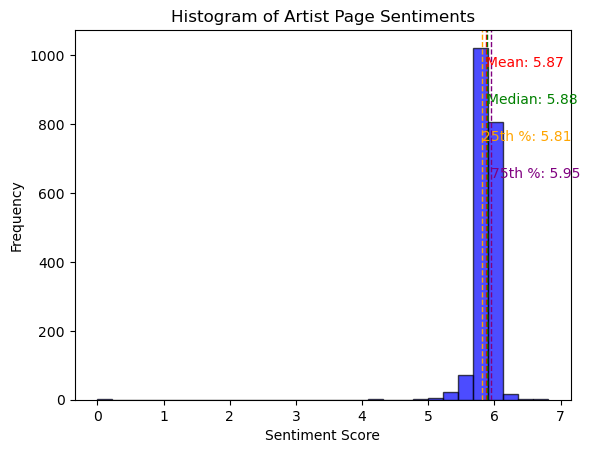

In [ ]:
# Plot the histogram of sentiment scores
plt.hist(statistics['sentiment_scores'], bins=30, alpha=0.7, color='blue', edgecolor='black')

# Add vertical lines for the mean, median, 25th percentile, and 75th percentile    
plt.axvline(statistics['average'], color='red', linestyle='dashed', linewidth=1)
plt.axvline(statistics['median'], color='green', linestyle='dashed', linewidth=1)
plt.axvline(statistics['25th_percentile'], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(statistics['75th_percentile'], color='purple', linestyle='dashed', linewidth=1)

plt.text(statistics['average'], plt.ylim()[1]*0.9, f"Mean: {statistics['average']:.2f}", color='red')
plt.text(statistics['median'], plt.ylim()[1]*0.8, f"Median: {statistics['median']:.2f}", color='green')
plt.text(statistics['25th_percentile'], plt.ylim()[1]*0.7, f"25th %: {statistics['25th_percentile']:.2f}", color='orange')
plt.text(statistics['75th_percentile'], plt.ylim()[1]*0.6, f"75th %: {statistics['75th_percentile']:.2f}", color='purple')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Artist Page Sentiments')

plt.show()

In [18]:
sentiment_scores = [(node, data['sentiment']) for node, data in G_sentiment.nodes(data=True) if 'sentiment' in data]
    
happiest_artists = sorted(sentiment_scores, key=lambda x: x[1], reverse=True)[:10]
saddest_artists = sorted(sentiment_scores, key=lambda x: x[1])[:10]

print("Happiest Artists:")
for artist, score in happiest_artists:
    print(f"{artist}: {score}")

print("\nSaddest Artists:")
for artist, score in saddest_artists:
    print(f"{artist}: {score}")


Happiest Artists:
Flying Burrito Brothers: 6.812
Bacon Brothers: 6.470000000000001
Soggy Bottom Boys: 6.32
Allman Brothers Band: 6.273333333333333
The Peasall Sisters: 6.272194244604317
Gina Jeffreys: 6.2522038216560505
Spirit Family Reunion: 6.230087336244542
Jasmine Rae: 6.212558459422283
Alyssa Micaela: 6.203393939393939
Aleyce Simmonds: 6.202189141856392

Saddest Artists:
McClymonts: 0.0
The Stonemans: 0.0
Jimmie Rodgers (country singer): 4.28
Brian Kelley (musician): 4.9825
Flatt & Scruggs: 5.093333333333334
Foggy Mountain Boys: 5.096
Jason Boland & the Stragglers: 5.12
Joanna Smith: 5.17
Kerry Harvick: 5.202857142857143
Riley Green (singer): 5.236


Now using the filtered graph with the artists with genres

In [20]:
import requests
import json
import community  # This is python-louvain

# Load genre data from URL
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/refs/heads/main/files/artists_genres_dictionary.txt"
response = requests.get(url)
genre_data = json.loads(response.text)

# List of artist names with genre data
artist_nodes = set(genre_data.keys())

# Filter the network to include only artists with genre data
filtered_G = G_undirect.subgraph(artist_nodes).copy()

In [21]:
# Apply the Louvain method to find communities
partition = community.best_partition(filtered_G)

# Group nodes by their community IDs
community_groups = {}
for node, comm_id in partition.items():
    if comm_id not in community_groups:
        community_groups[comm_id] = set()
    community_groups[comm_id].add(node)

# Display the partition structure (for verification)
for comm_id, nodes in community_groups.items():
    print(f"Community {comm_id}: {len(nodes)} nodes")

Community 0: 443 nodes
Community 4: 455 nodes
Community 2: 592 nodes
Community 13: 29 nodes
Community 9: 42 nodes
Community 5: 112 nodes
Community 3: 63 nodes
Community 7: 2 nodes
Community 1: 62 nodes
Community 12: 7 nodes
Community 11: 17 nodes
Community 6: 2 nodes
Community 8: 1 nodes
Community 10: 1 nodes


In [30]:
# Calculate the average sentiment of the nodes in each community
community_sentiments = {}
for comm_id, nodes in community_groups.items():
    sentiments = [filtered_G.nodes[node]['sentiment'] for node in nodes if 'sentiment' in filtered_G.nodes[node]]
    if sentiments:
        average_sentiment = np.mean(sentiments)
        community_sentiments[comm_id] = average_sentiment

# Sort communities by size and select the 10 largest ones
largest_communities = sorted(community_groups.items(), key=lambda x: len(x[1]), reverse=True)[:10]

print("Top 10 Largest Communities:")
for comm_id, nodes in largest_communities:
    num_nodes = len(nodes)
    avg_sentiment = community_sentiments.get(comm_id, 0.0)
    print(f"Community {comm_id} ({num_nodes} nodes): {avg_sentiment:.2f}")

Top 10 Largest Communities:
Community 2 (592 nodes): 5.89
Community 4 (455 nodes): 5.88
Community 0 (443 nodes): 5.82
Community 5 (112 nodes): 5.88
Community 3 (63 nodes): 5.86
Community 1 (62 nodes): 5.83
Community 9 (42 nodes): 5.97
Community 13 (29 nodes): 5.88
Community 11 (17 nodes): 5.81
Community 12 (7 nodes): 5.83


In [33]:
# Name each community by its three most connected characters
def get_top_connected_nodes(graph, nodes, top_n=3):
    subgraph = graph.subgraph(nodes)
    degrees = subgraph.degree()
    sorted_nodes = sorted(degrees, key=lambda x: x[1], reverse=True)
    return [node for node, _ in sorted_nodes[:top_n]]

community_names = {}
for comm_id, nodes in largest_communities:
    top_connected_nodes = get_top_connected_nodes(filtered_G, nodes)
    community_names[comm_id] = top_connected_nodes


# Identify the three happiest and saddest communities
sorted_communities_by_sentiment = sorted(community_sentiments.items(), key=lambda x: x[1], reverse=True)
happiest_communities = sorted_communities_by_sentiment[:4]
saddest_communities = sorted_communities_by_sentiment[-4:]

print("\nHappiest Communities:")
for comm_id, avg_sentiment in happiest_communities:
    if comm_id in community_names:
        print(f"Community {comm_id} ({', '.join(community_names[comm_id])}): {avg_sentiment:.2f}")

print("\nSaddest Communities:")
for comm_id, avg_sentiment in saddest_communities:
    if comm_id in community_names:
        print(f"Community {comm_id} ({', '.join(community_names[comm_id])}): {avg_sentiment:.2f}")


Happiest Communities:
Community 9 (Beccy Cole, Troy Cassar-Daley, Lee Kernaghan): 5.97
Community 2 (Hillary Lindsey, Blake Shelton, Keith Urban): 5.89
Community 13 (Sean Hogan, George Canyon, Aaron Pritchett): 5.88

Saddest Communities:
Community 1 (Curtis Wright, Robert Ellis Orrall, Sammy Kershaw): 5.83
Community 0 (Elvis Presley, Johnny Cash, George Jones): 5.82
Community 11 (Mike McClure, Cross Canadian Ragweed, Cody Canada): 5.81


In [34]:
# Compare the sentiment of the happiest and saddest communities to the overall distribution of sentiment
def calculate_statistics(graph):
    sentiment_scores = [data['sentiment'] for _, data in graph.nodes(data=True) if 'sentiment' in data]
    if not sentiment_scores:
        return None
    average_sentiment = np.mean(sentiment_scores)
    median_sentiment = np.median(sentiment_scores)
    variance_sentiment = np.var(sentiment_scores)
    percentile_25_sentiment = np.percentile(sentiment_scores, 25)
    percentile_75_sentiment = np.percentile(sentiment_scores, 75)
    return {
        'average': average_sentiment,
        'median': median_sentiment,
        'variance': variance_sentiment,
        '25th_percentile': percentile_25_sentiment,
        '75th_percentile': percentile_75_sentiment,
        'sentiment_scores': sentiment_scores
    }

overall_statistics = calculate_statistics(filtered_G)

print("Overall Sentiment Statistics:")
print(f"Average: {overall_statistics['average']}")
print(f"Median: {overall_statistics['median']}")
print(f"Variance: {overall_statistics['variance']}")
print(f"25th Percentile: {overall_statistics['25th_percentile']}")
print(f"75th Percentile: {overall_statistics['75th_percentile']}")

Overall Sentiment Statistics:
Average: 5.867866008736531
Median: 5.882606553621965
Variance: 0.03860354811837517
25th Percentile: 5.806724102270727
75th Percentile: 5.951155463200664


In [36]:
# Compare the sentiment of the happiest and saddest communities to the overall distribution of sentiment
def compare_community_to_overall(community_stats, overall_stats):
    comparison = {
        'average_difference': community_stats['average'] - overall_stats['average'],
        'median_difference': community_stats['median'] - overall_stats['median'],
        'variance_difference': community_stats['variance'] - overall_stats['variance'],
        '25th_percentile_difference': community_stats['25th_percentile'] - overall_stats['25th_percentile'],
        '75th_percentile_difference': community_stats['75th_percentile'] - overall_stats['75th_percentile']
    }
    return comparison

for comm_id, avg_sentiment in happiest_communities + saddest_communities:
    if comm_id in community_names:
        community_stats = calculate_statistics(filtered_G.subgraph(community_groups[comm_id]))
        comparison = compare_community_to_overall(community_stats, overall_statistics)
        print(f"\nComparison for Community {comm_id} ({', '.join(community_names[comm_id])}):")
        print(f"Average Difference: {comparison['average_difference']:.2f}")
        print(f"Median Difference: {comparison['median_difference']:.2f}")
        print(f"Variance Difference: {comparison['variance_difference']:.2f}")
        print(f"25th Percentile Difference: {comparison['25th_percentile_difference']:.2f}")
        print(f"75th Percentile Difference: {comparison['75th_percentile_difference']:.2f}")


Comparison for Community 9 (Beccy Cole, Troy Cassar-Daley, Lee Kernaghan):
Average Difference: 0.10
Median Difference: 0.11
Variance Difference: -0.02
25th Percentile Difference: 0.07
75th Percentile Difference: 0.11

Comparison for Community 2 (Hillary Lindsey, Blake Shelton, Keith Urban):
Average Difference: 0.02
Median Difference: 0.02
Variance Difference: -0.02
25th Percentile Difference: 0.03
75th Percentile Difference: 0.02

Comparison for Community 13 (Sean Hogan, George Canyon, Aaron Pritchett):
Average Difference: 0.02
Median Difference: -0.01
Variance Difference: -0.03
25th Percentile Difference: 0.01
75th Percentile Difference: 0.01

Comparison for Community 1 (Curtis Wright, Robert Ellis Orrall, Sammy Kershaw):
Average Difference: -0.04
Median Difference: -0.07
Variance Difference: -0.02
25th Percentile Difference: -0.04
75th Percentile Difference: -0.05

Comparison for Community 0 (Elvis Presley, Johnny Cash, George Jones):
Average Difference: -0.05
Median Difference: -0.

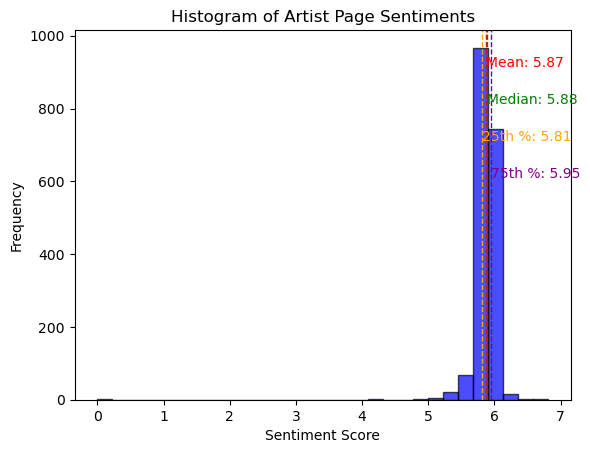

In [37]:
# Plot histogram of sentiment scores
def plot_histogram(sentiment_scores, statistics):
    plt.hist(sentiment_scores, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(statistics['average'], color='red', linestyle='dashed', linewidth=1)
    plt.axvline(statistics['median'], color='green', linestyle='dashed', linewidth=1)
    plt.axvline(statistics['25th_percentile'], color='orange', linestyle='dashed', linewidth=1)
    plt.axvline(statistics['75th_percentile'], color='purple', linestyle='dashed', linewidth=1)
    plt.text(statistics['average'], plt.ylim()[1]*0.9, f"Mean: {statistics['average']:.2f}", color='red')
    plt.text(statistics['median'], plt.ylim()[1]*0.8, f"Median: {statistics['median']:.2f}", color='green')
    plt.text(statistics['25th_percentile'], plt.ylim()[1]*0.7, f"25th %: {statistics['25th_percentile']:.2f}", color='orange')
    plt.text(statistics['75th_percentile'], plt.ylim()[1]*0.6, f"75th %: {statistics['75th_percentile']:.2f}", color='purple')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Artist Page Sentiments')
    plt.show()

plot_histogram(overall_statistics['sentiment_scores'], overall_statistics)